In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#import array as ar
import math as mat

In [22]:
dtst = pd.read_csv("reg_simple.csv")

In [23]:
dtst.head()

,heure_rev,note
0,2,10
1,3,12
2,4,20
3,5,22
4,6,21


In [24]:
X1 = dtst.iloc[:,:-1]
Y1 = dtst.iloc[:,-1]

In [25]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

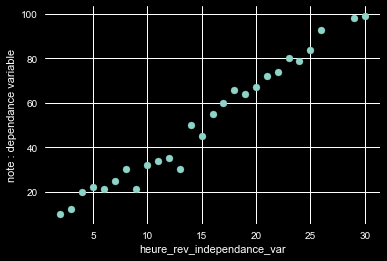

In [27]:
plt.scatter(X1, Y1)
plt.xlabel("heure_rev_independance_var")
plt.ylabel("note : dependance variable")
#plt.style.use(['dark_background', 'fast'])
plt.show()

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.2, random_state=0)


In [29]:
Regresseur = LinearRegression()

In [31]:
Regresseur.fit(X_train, Y_train)


LinearRegression()

In [32]:
#etablir une prediction
Y_Prediction = Regresseur.predict(X_test)

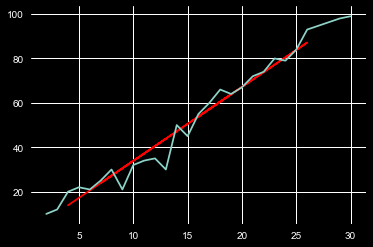

In [33]:
plt.plot(X_test, Y_Prediction, c='r')
plt.plot(X1, Y1)
plt.show()

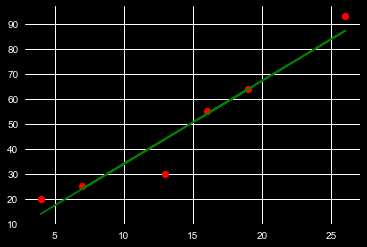

In [34]:
plt.plot(X_test, Y_Prediction, c='g')
plt.scatter(X_test, Y_test, c='r')
#plt.scatter(X1, Y1, c='b')
plt.show()

In [35]:
Regresseur.predict([[18]]) # --> array([60.51706037])

array([60.51706037])

    La prediction sur la valeur 18 a donné une erreur.
    parce dans notre dataset (on a la chance d'avoir un dataset petit'),
    on a un écart entre la valeur correspondante '66' et celle prédite.
    Pour remedier à ce problème, on implémente la fonction suivante :
        couramment connue sous le nom d'erreur quadratique moyenne

In [36]:
def rmse(val_obs, val_pred):
    y_actual = np.array(val_obs)
    y_pred = np.array(val_pred)
    error = (y_actual - y_pred)**2
    error_mean = round(np.mean(error))
    error_sq = mat.sqrt(error_mean)
    
    return error_sq

In [37]:
# Version condensée :
def rmse_cds(val_obs, val_pred):
    return mat.sqrt(round(np.mean((np.array(val_obs)-np.array(val_pred))**2)))

In [38]:
rmse(66, Regresseur.predict([[18]]))

5.477225575051661